In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

In [53]:
#Important necessary libraries
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings ('ignore')

In [54]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [55]:

# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [56]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2217.57it/s]


In [57]:

data.shape

(22564, 2)

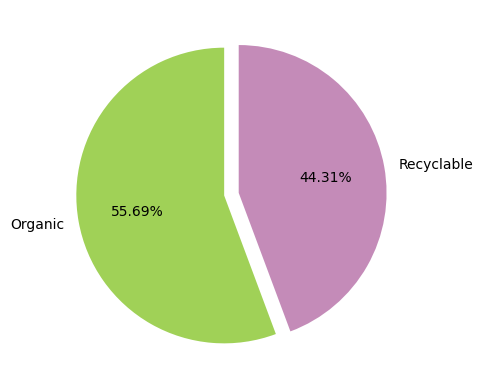

In [58]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()


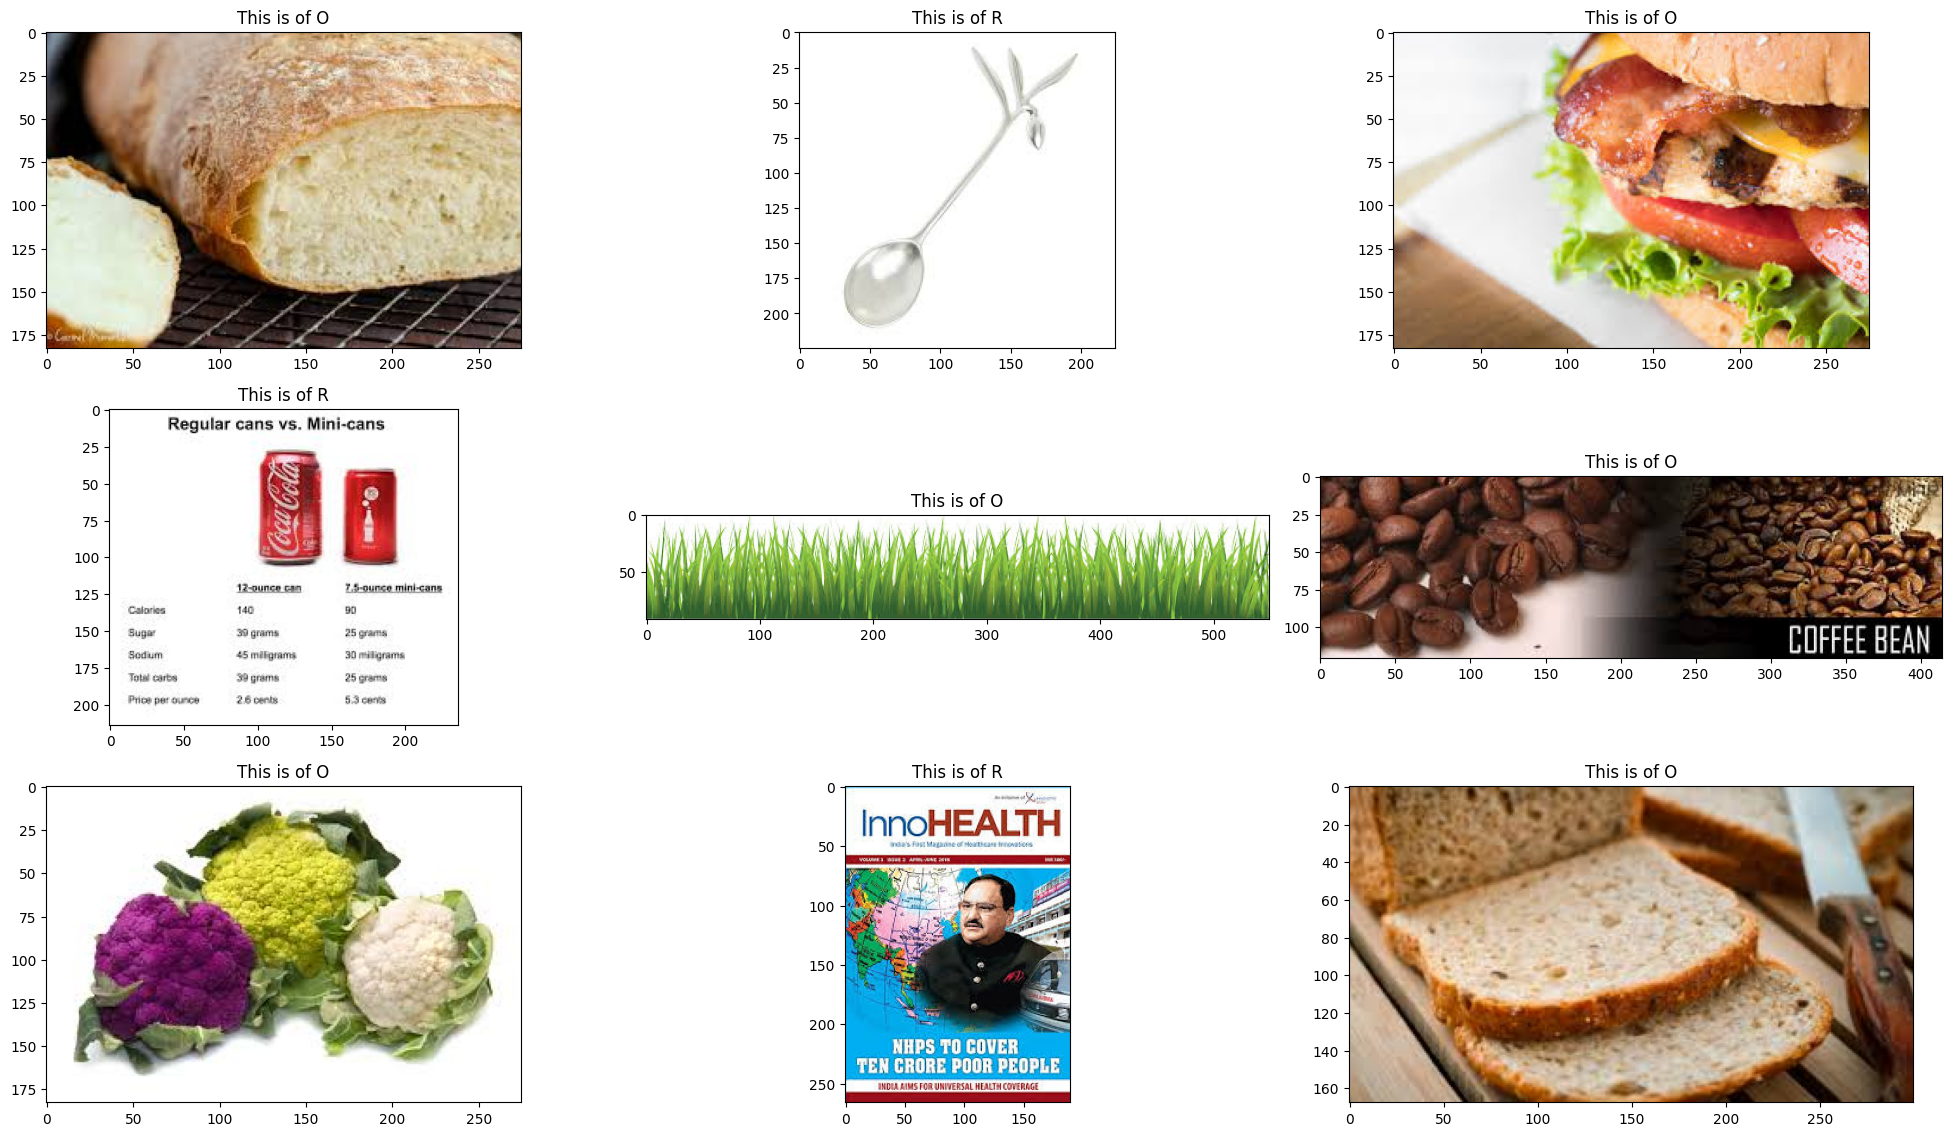

In [59]:

plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [60]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [65]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 62s 160ms/step - accuracy: 0.7666 - loss: 0.5451 - val_accuracy: 0.8595 - val_loss: 0.3869
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8350 - loss: 0.3990 - val_accuracy: 0.8552 - val_loss: 0.3399
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 152ms/step - accuracy: 0.8561 - loss: 0.3548 - val_accuracy: 0.8540 - val_loss: 0.3301
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.8670 - loss: 0.3309 - val_accuracy: 0.8782 - val_loss: 0.3018
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8868 - loss: 0.2907 - val_accuracy: 0.8930 - val_loss: 0.2802
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.9032 - loss: 0.2520 - val_accuracy: 0.9089 - val_loss: 0.2487
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.9265 - loss: 0.1988 - val_accuracy: 0.9073 - val_loss: 0.3157
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 77s 139ms/step - accuracy: 0.9412 - loss: 0

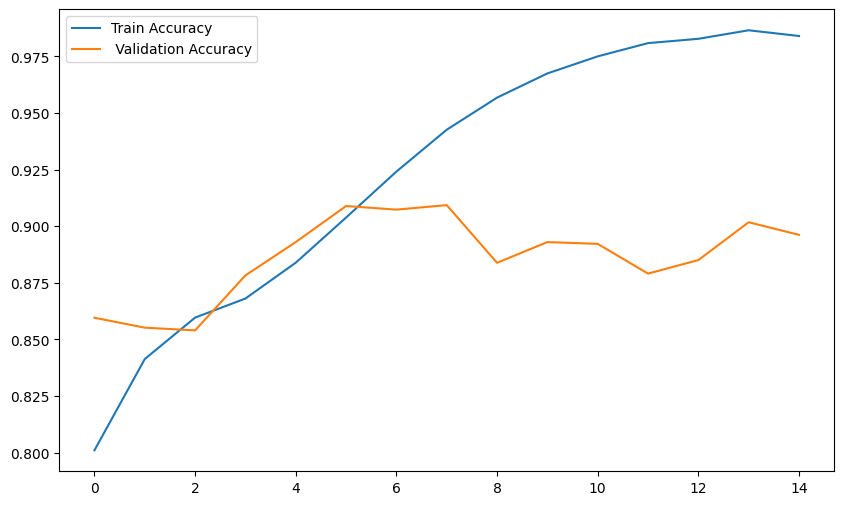

In [66]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

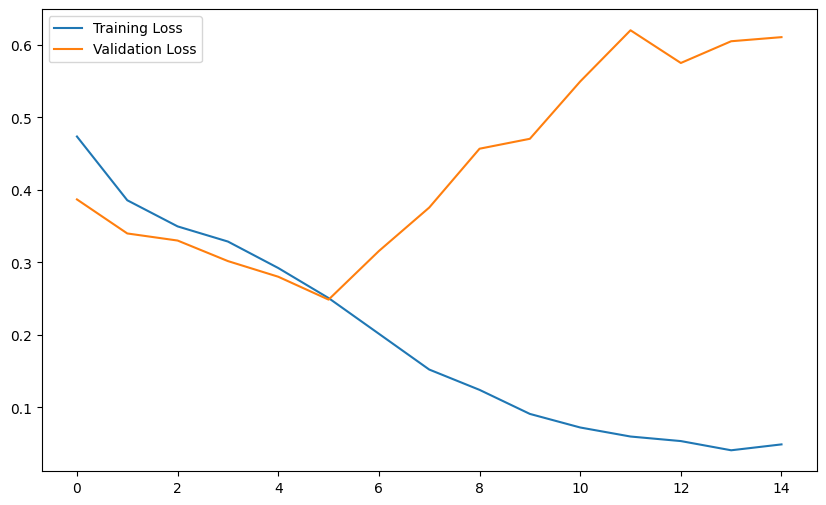

In [67]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [72]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  print(train_generator.class_indices)
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
{'O': 0, 'R': 1}
The image shown is Organic Waste


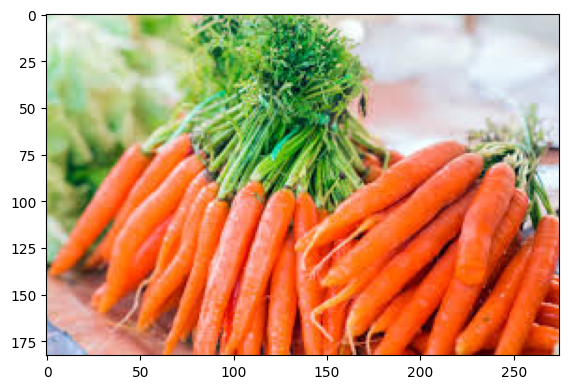

In [73]:

test_img = cv2.imread('/content/O_12585.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
{'O': 0, 'R': 1}
The image shown is Organic Waste


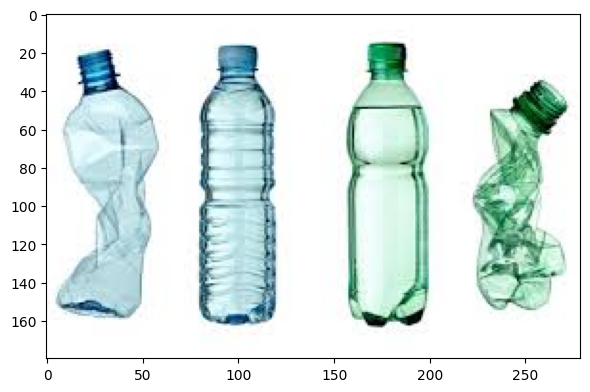

In [74]:
test_img = cv2.imread('/content/R_19.jpg')
predict_fun(test_img)
